# Tree vs. Boosting

- small trees are interpretable, but need control over bias-variance tradeoff


- Boosting combine both strength of trees and additive models

    - component functions are added in a greedy way,
    
    - fitting a new model on reweighted data set

# Type of Boosting

- Adaptive Boosting (AdaBoost)

- Graident Boosting

    - Gradient Tree Boosting - Friedman

- XG Boost

# weak learner (base learner/component functions)

- a weak learner is a **classifier** that does slightly better than random guess (error rate 50%)


- like "rules of thumb":

    - if an email has a word "Viagra", more likely it is not a spam
    
    - an email from a friend is probably not a spam


- "extract wisdom from a committee of fools":

    if we combine a set of weak learners, we can have a better performance (make accurate predictions)


- often we use a tree of depth 5, but a decision stump is a good place to start


## decision stump 决策树桩

- a decision stump (1-rules) is a tree of depth 1, with only 1 decision rule (i.e., a single split on a feature, makes a prediction based on the value of just a single input feature). 

- a decision tree with one internal node (the root) immediately connected to the terminal nodes (its leaves). 

- used as **components (called "weak learners" or "base learners")** in boosting.

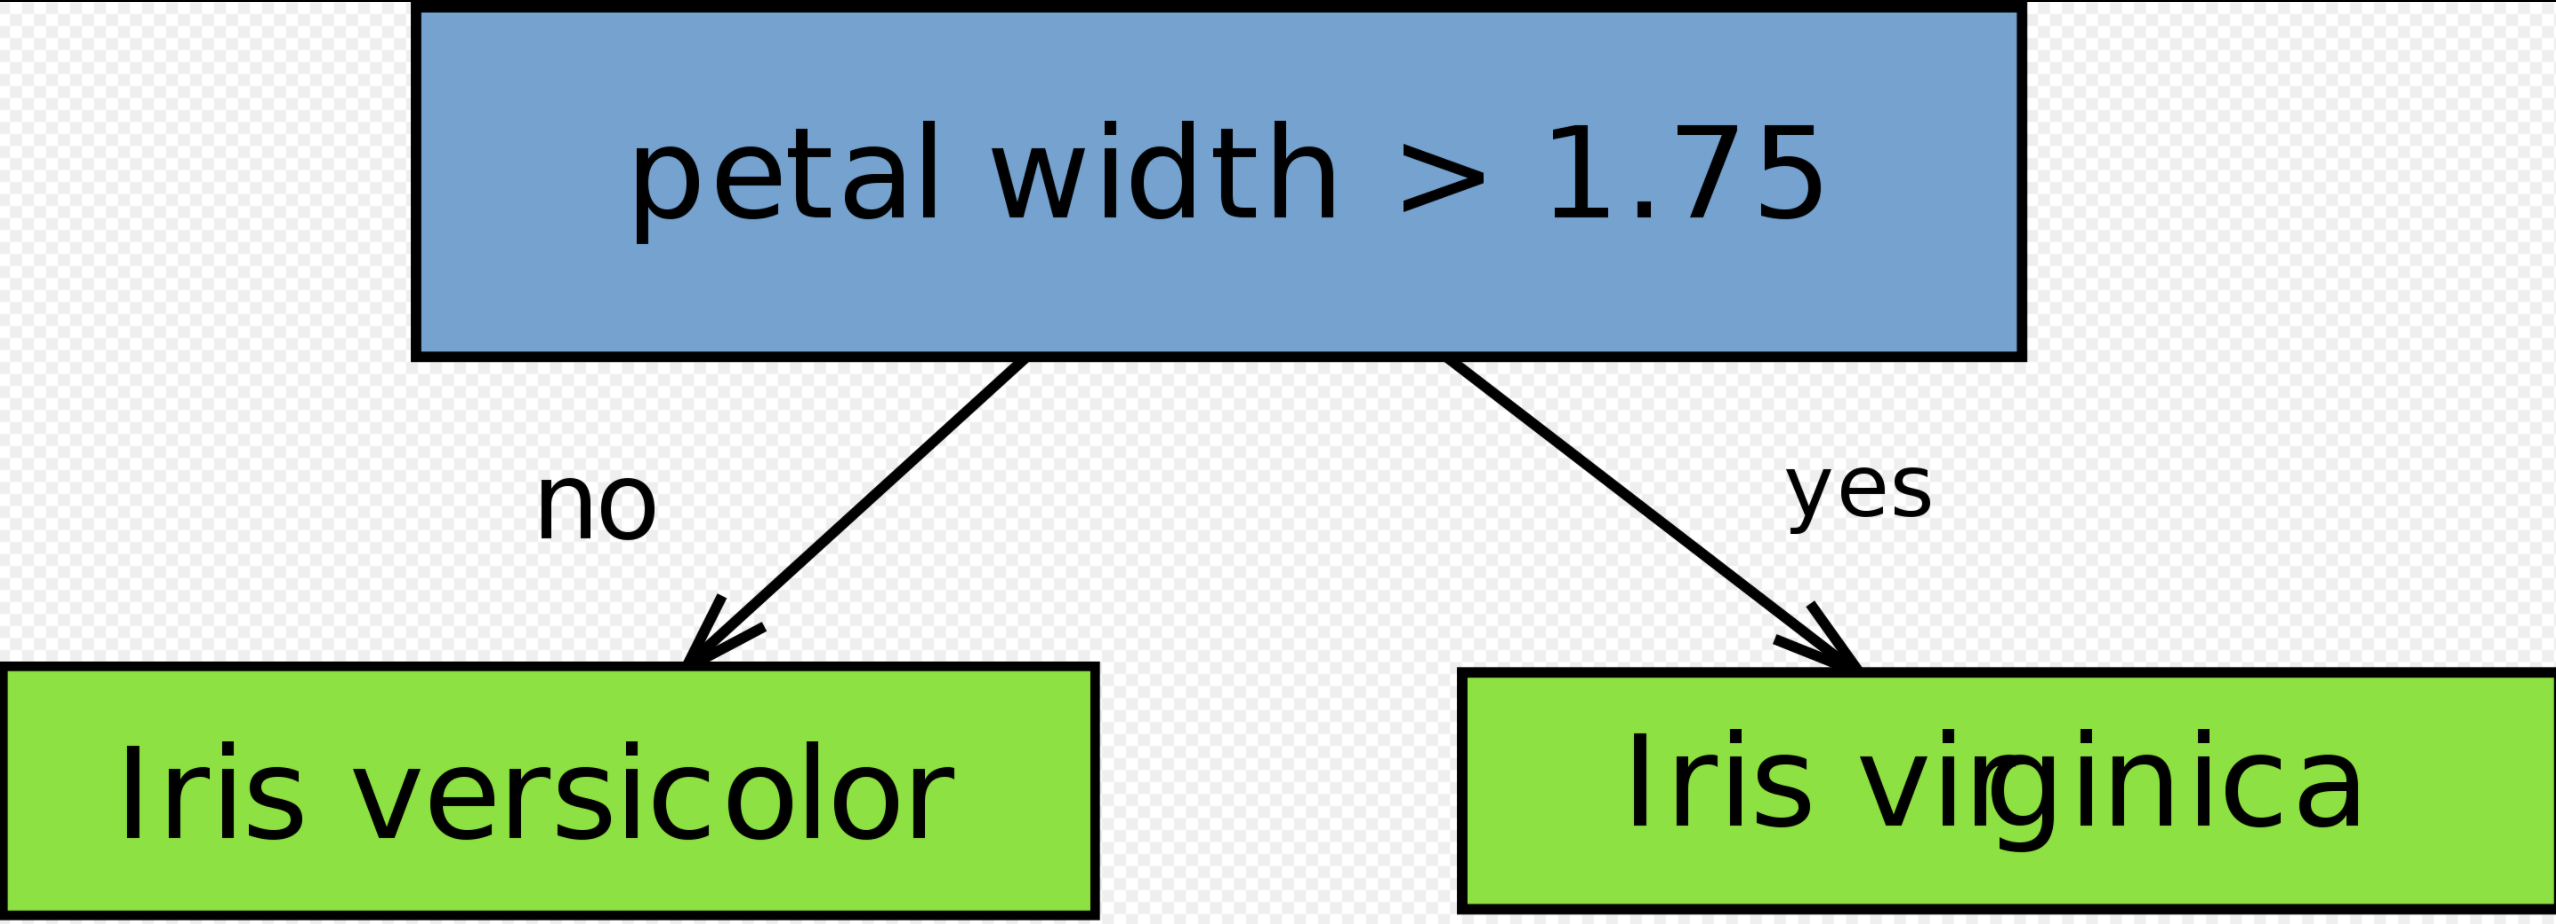

# idea of boosting: learn from mistake

boosting belongs to sequential ensemble methods

multiple models are built sequentially based on previous model's performance,

like optimization, next model try to improve where previous model lack

for this section, we talk about binary classification $Y \in \left\{-1,1\right\}$

- we combine multiple weak learners


- data is **iteratively reweighted** for $M$ iterations, assign more weight to observs that **have errors**


- a new component (weak learner) is estimated on the **weighted** data


- each weak classifier $G_m(x)$ outputs a class label $\left\{-1,1\right\}$


- often we use decision stump as weak classifier


- we produce a seq of weak classifiers $\left\{G_1(x),G_2(x),...,G_M(x)\right\}$ with corresponeding weights $\alpha_m$


- final classifier is

$$
G(x)=\text{sign}\left(\sum_{m=1}^M \alpha_m G_m(x) \right)
$$

it is a **linear additive model**, combine multiple weak classifiers in a linear way, which means multiple $G_m(x)$ models are additive

it could be interpreted in 2 ways:

1. linear regression model

2. random forest

    where $\alpha_m = \frac{1}{m}$, $G_m(x)$ is a seq of complex trees

- this structure is easy for **cross validation**

    set $M$ to be very large, if want to cross validate $m$ th model, don't need to retrain trees, because for a fixed $M$, $m$ th model $G_m(x)$ is same, 

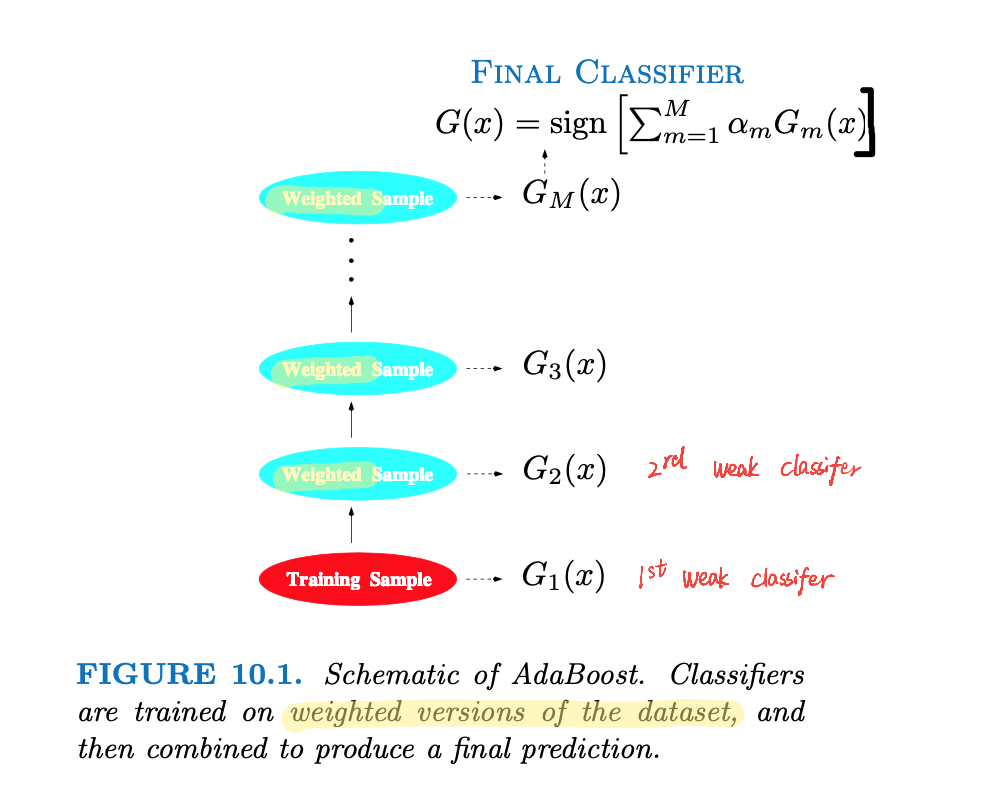

# weighted data

- $n$ weights are assigned to $n$ observs respectively in each iterations

    weight $w_1$ for 1th observ $(x_1,y_1)$, 
    
    weight $w_i$ for ith observ $(x_i,y_i)$, ...
    

- for 1st iteration (step): start with equal weights $w_i=\frac{1}{n}$ for every observ


- for $m$ th iteration, observs that were misclassified by $G_{m-1}(x)$ at previous step have weights increased, changed to $w_i\exp(\alpha_m)$


- each successive classifier is forced on focus on observs that were misclassified by previous classifiers

## how to use weights?

training goal is to minimize **weighted empirical risk**

$$
G_m(x)=\underset{G \in F}{\arg \min} \frac{1}{W} \sum_{i=1}^n {\color{Red} {w_i}} L(y_i, G(x_i))
$$

where $W=\sum_{i=1}^n w_i$ is for normalization, 

   ${\color{Red} {w_i}}$ is weight for $i$ th observ, 

   $L(y_i, f(x_i))$ is loss function for $i$ th observ, for classification, loss function is 0-1 loss

   $G$ is model of $m$ th iteration

if weights are even ($w$), the **weighted empirical risk** reduced to **empirical risk**

$$
\hat R = \frac{1}{W} \sum_{i=1}^n w_i L(y_i, G(x_i))=\frac{1}{nw} \sum_{i=1}^n w L(y_i, G(x_i))=\frac{1}{n} \sum_{i=1}^n L(y_i, G(x_i))
$$

## sample a new data set

if we can't conveniently train model using **reweighted data**, 

we can sample a new data set from training set with probabilities ($\frac{w_1}{W},...,\frac{w_n}{W}$) for each observ

# algorithm

P339 Elements of Statistical Learning Theory book.

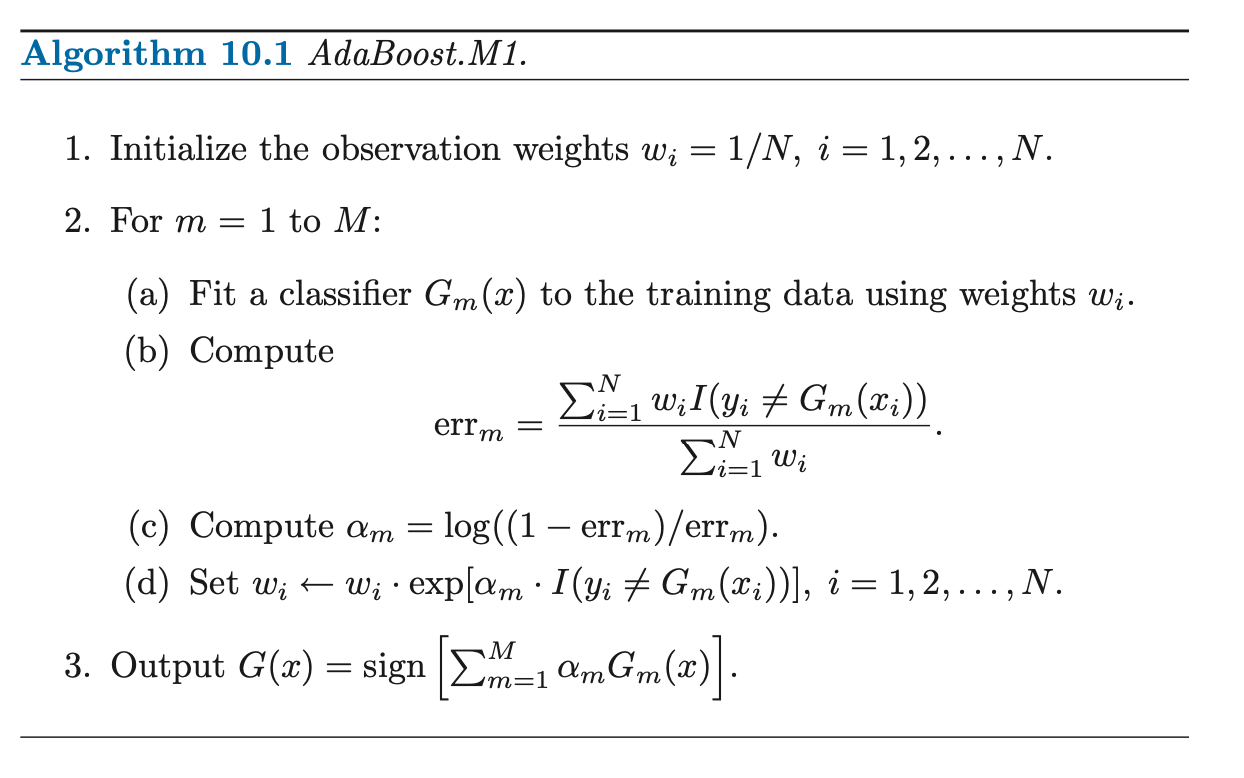

suppose we have a training set with $n$ observs: $D=\left\{ (x_1,y_1),...,(x_n,y_n)  \right\}$


**Note $w_i$ and $\alpha_m$ are all scalars**

$w_i$ is weight for $i$ th observ $(x_i,y_i)$, $w_i > 0$, $\frac{w_i}{W} \in [0,1]$

$\alpha_m$ is weight for $m$ th classifier $G_m(x)$, $\alpha_m > 0$

1. initialize weights for each observ to be even $w_i=\frac{1}{n}$

    where $w_i$ is weight for $i$ th observ


2. for $m$ th iteration, $m=1,...,M$

    1) fit weak classifier $G_m(x)$ to training data using weights $w_i$
    
    goal is to minimize **weighted empirical risk**
    
    $$
    G_m(x)=\underset{G \in F}{\arg \min} \frac{1}{W} \sum_{i=1}^n w_i L(y_i, G(x_i))
    $$
    
    where $F$ is function class, here we use decision stump, 
    
    $W=\sum_{i=1}^n w_i$ is for normalization
    
    
   2) compute **weighted error** $err_m$ (empirical risk for 0-1 loss)
    
   $$
    err_m = \frac{\sum_{i=1}^n w_i \mathbb{1} \left( y_i \neq G_m(x_i) \right)}{\sum_{i=1}^n w_i} \in [0,0.5]
   $$

   3) compute **weight of classifier $G_m(x)$** ($\alpha_m$) for new weight ($w_i$)

$$
{\color{Red}{\alpha_m = \ln \left(\frac{1- err_m}{err_m}\right)}}
$$

4) update weight $w_i$ for next $m+1$ th iteration

   if $G_m$ classifies $x_i$ correctly, $w_i$ is unchanged; otherwise, $w_i$ is increased to $w_i e^{\alpha_m}$ 

$$
w_i^{(m+1)} = w_i^{(m)} {\color{Red}{\exp \left[ \alpha_m \mathbb{1}\left( y_i \neq G_m(x_i)\right)\right]}}
$$

$$
i.e.\ w_i^{(m+1)}=\left\{\begin{matrix}
w_i^{(m)} & y_i = G_m(x_i)\\ 
w_i^{(m)} \exp(\alpha_m)=w_i^{(m)}\frac{1-err_m}{err_m} & y_i \neq G_m(x_i)
\end{matrix}\right.
$$

3. output final classifier $G(x)$

$$
G(x)=\text{sign}\left[\sum_{m=1}^M \alpha_m G_m(x) \right]
$$

## choice of iteration times $M$

1. $M$ to be large 


2. $M= \sqrt n$

## classifier weight $\alpha_m$ vs. weighted error $err_m$

- the larger weighted error, the smaller classifier weight

- **weight of classifier $G_m(x)$** is $\alpha_m$ in final ensemble

$$
\alpha_m = \ln \left(\frac{1- err_m}{err_m}\right)
$$

Note, when weighted error $err_m \rightarrow 0.5$, classifier weight $\alpha_m \rightarrow 0$

because 0.5 is the error rate for random guess, this classifier can no longer effectively learn from data, so classifier weight $\alpha_m = 0$, this classifier will not affect final classifier, 

$$
\alpha_m G_m(x)=0
$$

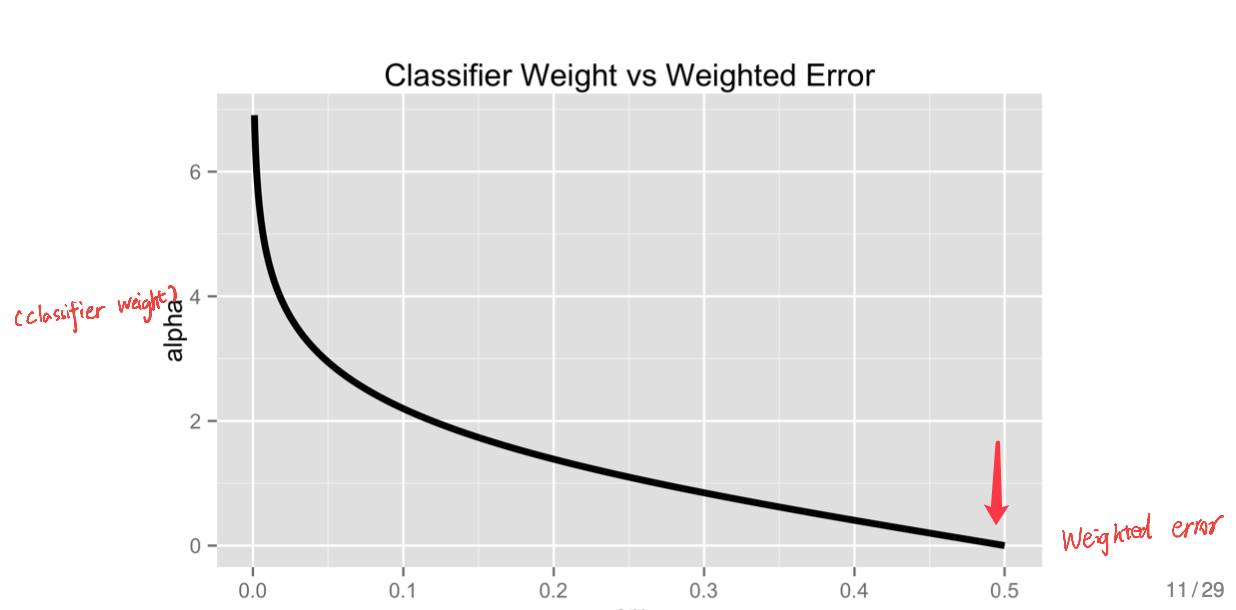

# visualization

- class label $\left \{ {\color{Blue} {-1}},{\color{Red} {+1}} \right \}$

- yellow line: decision boundary

- size of plus represents size of weights

- blackness represents score for red class

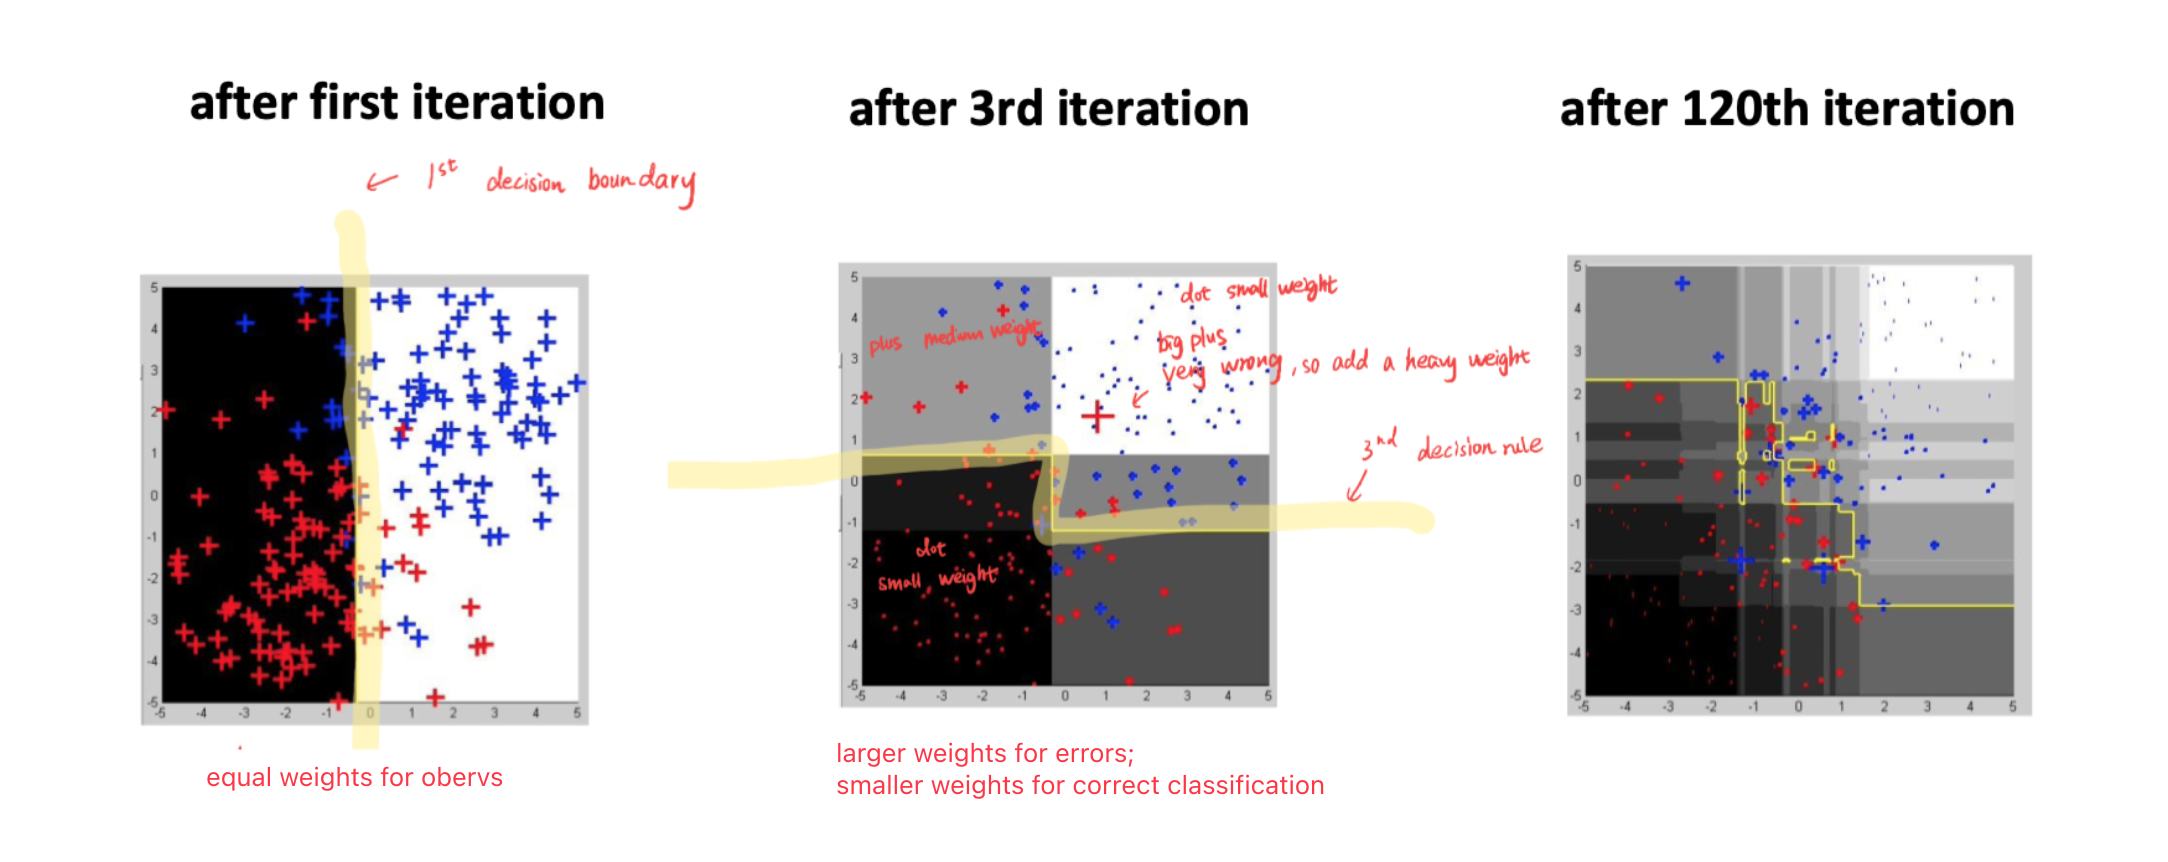

# nice property of AdaBoost

## AdaBoost is resistant to overfitting

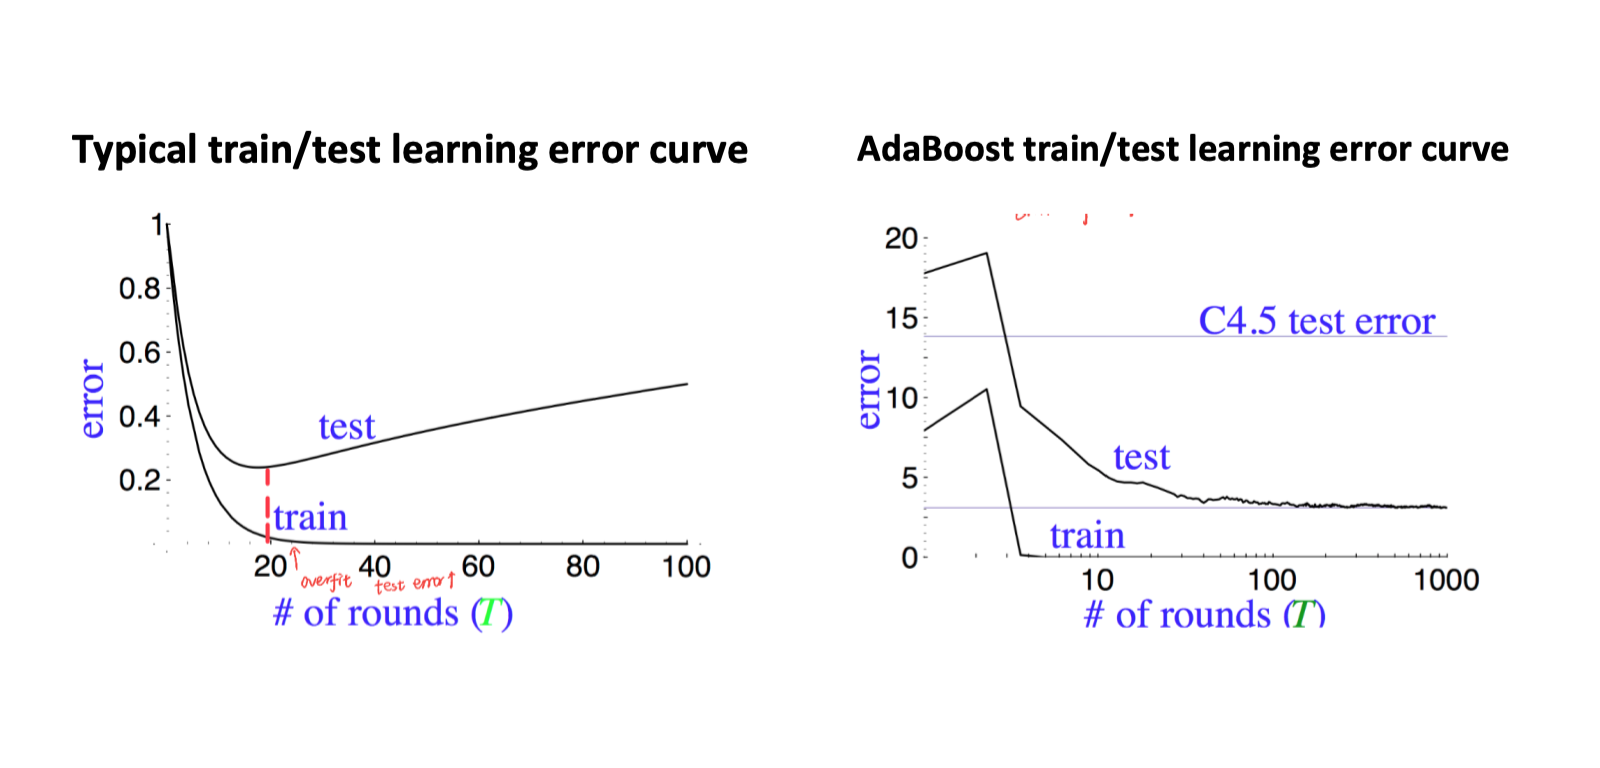

- for typical model, often test error will ↑ when training times ↑, which means **overfitting**


- nice thing of AdaBoost is that test error continues ↓ when training times ↑, which means **AdaBoost is resistant to overfitting**

- C4.5 is an algorithm used to generate a decision tree developed by Ross Quinlan

## Test Error: AdaBoost vs. a single stump vs. complex tree

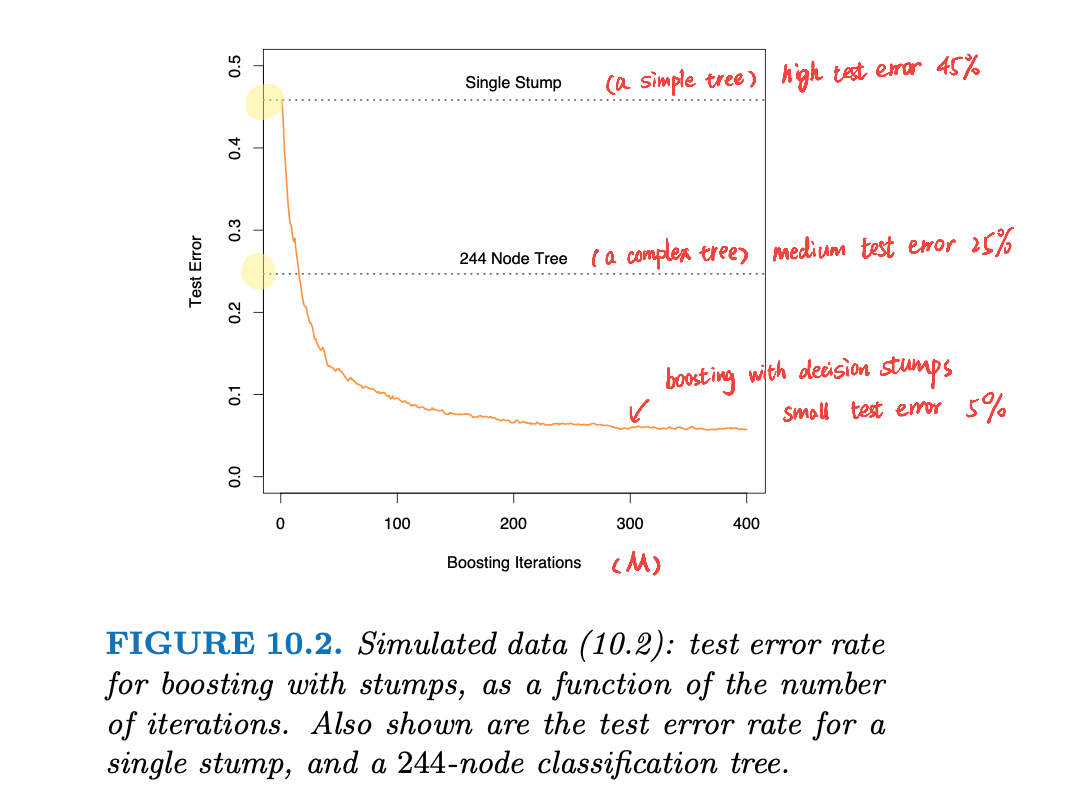

# additive models: more general framework

## score function

recall the final output is:

$$
G(x)=sign\left[\sum_{m=1}^M \alpha_m G_m(x) \right]
$$

$\sum_{m=1}^M \alpha_m G_m(x)$ is a **score function**

more general, let weak learners $G(x)$ to be $b(x;\gamma)$ with respect to $\gamma$

where $\gamma$ is the value of split point of a feature

then the score function is:

$$
f_{\alpha, \gamma}(x)=\sum_{m=1}^M \alpha_m b(x;\gamma_m)
$$

now training goal is to solve:

$$
\underset{\alpha, \gamma}{\arg \min} \sum_{i=1}^n L\left(y_i, {\color{Red}{f_{\alpha, \gamma}(x_i)}}\right)
$$

but solving this is computationally complex

How does AdaBoost address this?

## forward stagewise additive modeling

AdaBoost address this problem by forward stagewise additive modeling

it's a greedy algorithm: 

- rather than directly learn $\alpha$ and $\gamma$, we learn $\beta$ and $\gamma$, 


- for each iteration, we try to correct $f_{m-1}(x)$

- add a component function $b(x;\gamma)$ with **weight $\beta$** to the previous ensembles $f_{m-1}(x)$

$$
f_{m}(x)=f_{m-1}(x)+\beta\ b(x;\gamma)
$$


- then training goal is to solve

$$
(\hat{\beta}_m, \hat{\gamma}_m)=\underset{\beta, \gamma}{\arg \min} \sum_{i=1}^n L \left(y_i, {\color{Red} {f_{m-1}(x)+\beta\  b(x;\gamma)}}\right)
$$


- **the loss function is chosen based on problem**

- we never go back and update the previous function,

    but, if the previous function $f_{m-1}$ is not so bad, we can use the same function $f_{m-1}$ as $b(x;\gamma)$ for the next iteration

$$
f_m(x)=f_{m-1}(x)+\beta f_{m-1}(x)
$$

## choice of loss function

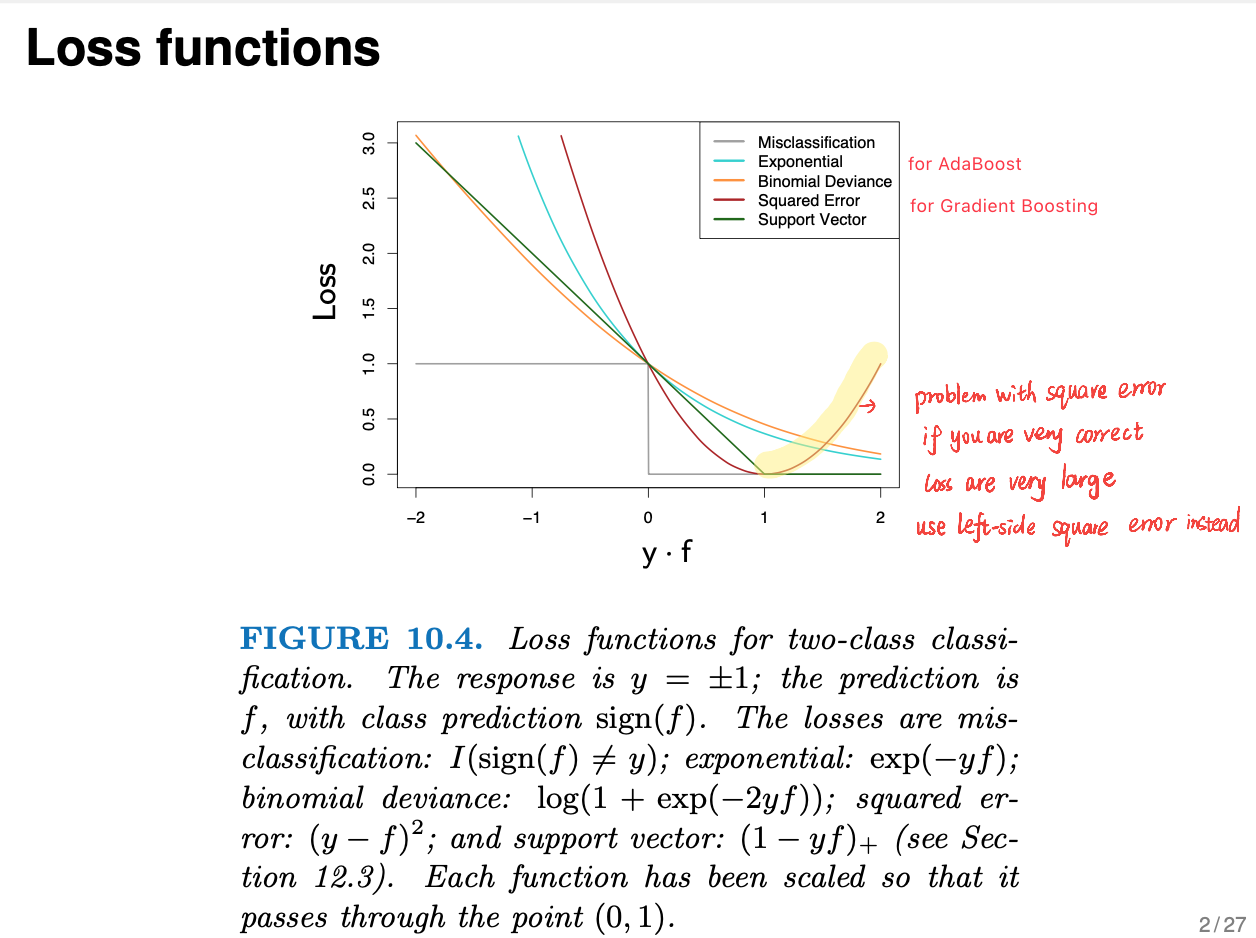

### exponential loss for AdaBoost

AdaBoosting use exponential loss as loss function

$$
L(y, f(x))=\exp(-y f(x))
$$

we can show that optimize exponential loss yields the same result as 0-1 loss

now training goal is to solve

$$
\begin{align}
(\hat{\beta}_m, \hat{G}_m)
&=\underset{\beta, G}{\arg \min} \sum_{i=1}^n \exp \left[-y_i[f_{m-1}(x_i)+\beta\ G(x_i)]\right]\\[1em]

&=\underset{\beta, G}{\arg \min} \sum_{i=1}^n \exp \left[-y_if_{m-1}(x)\right] \exp\left[-\beta\ y_i \ G(x_i)\right]\\[1em]

&=\underset{\beta, G}{\arg \min} \sum_{i=1}^n {\color{Red}{w_i^{(m)}} }\exp\left[-\beta\ y_i \ G(x_i)\right]\\[1em]

&=\sum _{y_i=G(x_i)} w_i^{(m)}e^{-\beta}+\sum _{y_i \neq G(x_i)}  w_i^{(m)}e^{\beta}\\[1em]

&=e^{-\beta}\sum _{y_i=G(x_i)}w_i^{(m)}+e^{\beta}\sum _{y_i \neq G(x_i)}w_i^{(m)}\\[1em]

&=\left ( e^{\beta}-e^{-\beta} \right ){\color{Red} {\sum _{i=1}^n w_i^{(m)}\mathbb{1}(y_i \neq G(x_i))}}+e^{-\beta}\sum _{i=1}^n w_i^{(m)}\\[1em]
\end{align}
$$

where $w_i^{(m)}=\exp \left[-y_if_{m-1}(x_i)\right]$ is weight for ith observ in the $m$ th iteration

$\beta_m$ is weight for $m$ th decision stump (classifer) $G_m$

since $\left ( e^{\beta}-e^{-\beta} \right )>0$ for $\beta >0$ and $e^{-\beta}\sum _{i=1}^n w_i^{(m)}$ is independent of $G$

solving optimal $G_m$ is independent of $\beta$, just minimizing a **weighted 0-1 loss**

$$
\hat{G}_m = \arg \min_G \sum _{i=1}^n w_i^{(m)}\mathbb{1}(y_i \neq G(x_i))
$$

therefore, we can first find $G_m$, then plug $G_m$ back in (6) to find $\beta_m$

set Loss = 0

$$
\beta_m = \frac{1}{2}ln\left(\frac{1-err_m}{err_m}\right)
$$

where $err_m$ is **weighted error (rate)** 
    
   $$
    err_m = \frac{\sum_{i=1}^n w_i^{(m)} \mathbb{1} \left( y_i \neq G_m(x_i) \right)}{\sum_{i=1}^n w_i^{(m)}}
   $$

**update weight $w_i$ for next $m+1$ th iteration**

$$
w_i^{(m+1)} = w_i^{(m)} \times \exp [-\beta_m\ y_i \ G_m(x_i)]
$$

refactorizing it, we have

$$
w_i^{(m+1)} = \exp (-\beta_m)\ w_i^{(m)} \times \exp [{\color{Red}2\beta_m} \mathbb{1}(y_i \neq G_m(x_i))]
$$

and we can ignore scaler $\exp (-\beta_m)$

recall previous we update weight by

$$
w_i^{(m+1)} = w_i^{(m)} \times \exp \left[ {\color{Red}\alpha_m} \mathbb{1}\left( y_i \neq G_m(x_i)\right)\right]
$$

Thus, **weight of classifier $G_m(x)$** $\alpha_m$ equals $2\beta_m$

$$
\alpha_m = \ln \left(\frac{1- err_m}{err_m}\right) = 2\beta_m\\[1em]
\beta_m = \frac{1}{2}\alpha_m
$$

thus AdaBoost using exponential loss as loss function is the same as using 0-1 loss

#### exponential loss is a good surrogate for 0-1 loss

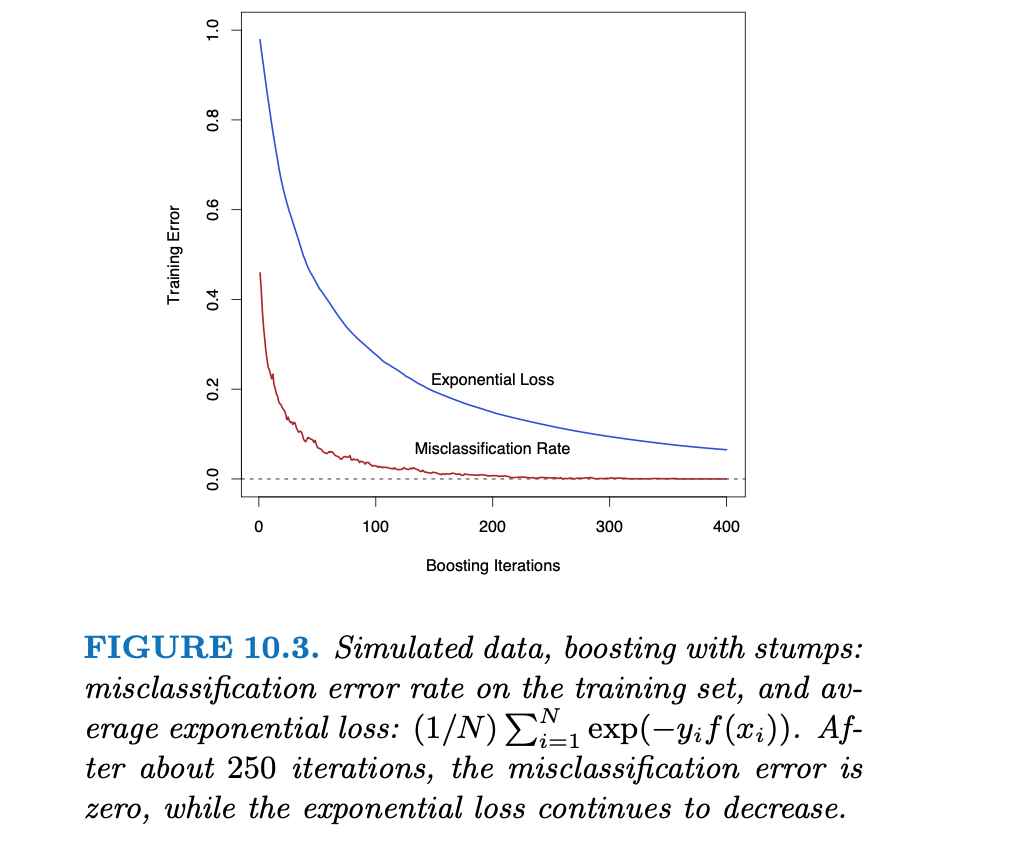